In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.cifar100.load_data()

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_test.shape

(10000, 1)

In [7]:
x_train[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [195, 205, 193],
        [212, 224, 204],
        [182, 194, 167]],

       [[255, 255, 255],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [170, 176, 150],
        [161, 168, 130],
        [146, 154, 113]],

       [[255, 255, 255],
        [254, 254, 254],
        [255, 255, 255],
        ...,
        [189, 199, 169],
        [166, 178, 130],
        [121, 133,  87]],

       ...,

       [[148, 185,  79],
        [142, 182,  57],
        [140, 179,  60],
        ...,
        [ 30,  17,   1],
        [ 65,  62,  15],
        [ 76,  77,  20]],

       [[122, 157,  66],
        [120, 155,  58],
        [126, 160,  71],
        ...,
        [ 22,  16,   3],
        [ 97, 112,  56],
        [141, 161,  87]],

       [[ 87, 122,  41],
        [ 88, 122,  39],
        [101, 134,  56],
        ...,
        [ 34,  36,  10],
        [105, 133,  59],
        [138, 173,  79]]

In [8]:
x_train.max()

255

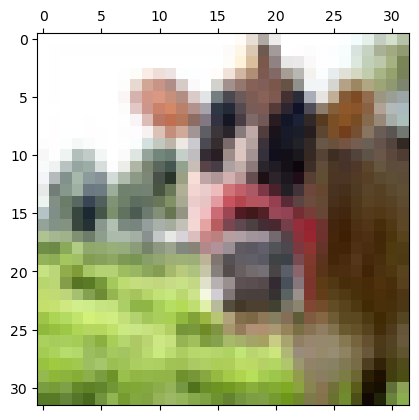

In [9]:
plt.matshow(x_train[0])

In [10]:
y_train[:5]

array([[19],
       [29],
       [ 0],
       [11],
       [ 1]])

In [11]:
y_test[:5]

array([[49],
       [33],
       [72],
       [51],
       [71]])

In [12]:
y_train=y_train.reshape(-1,)
y_train[:10]

array([19, 29,  0, 11,  1, 86, 90, 28, 23, 31])

In [13]:
y_test=y_test.reshape(-1,)
y_test[:5]

array([49, 33, 72, 51, 71])

In [57]:
#  classes={'aquatic mammals':['beaver', 'dolphin', 'otter', 'seal', 'whale'],
# 'fish':['aquarium fish', 'flatfish', 'ray', 'shark', 'trout'],
# 'flowers':['orchids', 'poppies', 'roses', 'sunflowers', 'tulips'],
# 'food containers':['bottles', 'bowls', 'cans', 'cups', 'plates'],
# 'fruit and vegetables':['apples', 'mushrooms', 'oranges', 'pears', 'sweet peppers'],
# 'household electrical devices':['clock', 'computer keyboard', 'lamp', 'telephone', 'television'],
# 'household furniture':['bed', 'chair', 'couch', 'table', 'wardrobe'],
# 'insects':['bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach'],
# 'large carnivores':['bear', 'leopard', 'lion', 'tiger', 'wolf'],
# 'large man-made outdoor things':['bridge', 'castle', 'house', 'road', 'skyscraper'],
# 'large natural outdoor scenes':['cloud', 'forest', 'mountain', 'plain', 'sea'],
# 'large omnivores and herbivores':['camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo'],
# 'medium-sized mammals':['fox', 'porcupine', 'possum', 'raccoon', 'skunk'],
# 'non-insect invertebrates':['crab', 'lobster', 'snail', 'spider', 'worm'],
# 'people':['baby', 'boy', 'girl', 'man', 'woman'],
# 'reptiles':['crocodile', 'dinosaur', 'lizard', 'snake', 'turtle'],
# 'small mammals':['hamster', 'mouse', 'rabbit', 'shrew', 'squirrel'],
# 'trees':['maple', 'oak', 'palm', 'pine', 'willow'],
# 'vehicles 1':['bicycle','bus', 'motor cycle', 'pickup truck', 'train'],
# 'vehicles 2':['lawn-mower','rocket','streetcar','tank','tractor']}

In [63]:
classes=['beaver', 'dolphin', 'otter', 'seal', 'whale','aquarium fish', 'flatfish', 'ray', 'shark', 'trout','orchids', 'poppies', 'roses', 'sunflowers', 'tulips',
       'bottles', 'bowls', 'cans', 'cups', 'plates','apples', 'mushrooms', 'oranges', 'pears', 'sweet peppers','clock', 'computer keyboard', 'lamp', 'telephone', 'television',
       'bed', 'chair', 'couch', 'table', 'wardrobe','bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach','bear', 'leopard', 'lion', 'tiger', 'wolf',
       'bridge', 'castle', 'house', 'road', 'skyscraper','cloud', 'forest', 'mountain', 'plain', 'sea','camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo',
       'fox', 'porcupine', 'possum', 'raccoon', 'skunk','crab', 'lobster', 'snail', 'spider', 'worm','baby', 'boy', 'girl', 'man', 'woman','crocodile', 'dinosaur', 'lizard', 'snake', 'turtle'
       'hamster', 'mouse', 'rabbit', 'shrew', 'squirrel','maple', 'oak', 'palm', 'pine', 'willow','bicycle','bus', 'motor cycle', 'pickup truck', 'train','lawn-mower','rocket','streetcar','tank','tractor']

In [64]:
superclasses=['aquatic mammals','fish','flowers','food containers','fruit and vegetables','household electrical devices',
              'household furniture','insects','large carnivores','large man-made outdoor things','large natural outdoor scenes',
              'large omnivores and herbivores','medium-sized mammals','non-insect invertebrates','people','reptiles',
              'small mammals','trees','vehicles 1','vehicles 2']

In [66]:
def plot_sample(x,y,index):
    plt.figure(figsize=(13,1))
    plt.imshow(x[index])
    plt.title(superclasses[int(y[index]/5)])
    plt.xlabel(classes[y[index]])

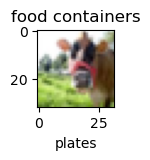

In [72]:
plot_sample(x_train,y_train,0)

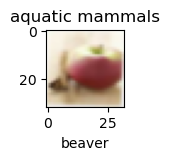

In [73]:
plot_sample(x_train,y_train,2)

In [74]:
x_train=x_train/255
x_test=x_test/255

In [75]:
ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(2000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(100,activation='softmax')
    
])
ann.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
ann.fit(x_train,y_train,epochs=5)


Epoch 1/5
1563/1563 [==============================] - 188s 117ms/step - loss: 4.1100 - accuracy: 0.0680
Epoch 2/5
1563/1563 [==============================] - 184s 118ms/step - loss: 3.7669 - accuracy: 0.1169
Epoch 3/5
1563/1563 [==============================] - 241s 154ms/step - loss: 3.5925 - accuracy: 0.1473
Epoch 4/5
1563/1563 [==============================] - 191s 122ms/step - loss: 3.4846 - accuracy: 0.1684
Epoch 5/5
1563/1563 [==============================] - 186s 119ms/step - loss: 3.3962 - accuracy: 0.1863


In [76]:
ann.evaluate(x_test,y_test)

313/313 [==============================] - 8s 17ms/step - loss: 3.4202 - accuracy: 0.1867


[3.4201526641845703, 0.1867000013589859]

In [77]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
y_pred=ann.predict(x_test)
y_pred_classes=[np.argmax(element) for element in y_pred]
print(classification_report(y_test,y_pred_classes))

313/313 [==============================] - 6s 17ms/step
              precision    recall  f1-score   support

           0       0.43      0.35      0.38       100
           1       0.25      0.32      0.28       100
           2       0.17      0.17      0.17       100
           3       0.16      0.05      0.08       100
           4       0.08      0.02      0.03       100
           5       0.12      0.17      0.14       100
           6       0.23      0.09      0.13       100
           7       0.21      0.14      0.17       100
           8       0.10      0.22      0.14       100
           9       0.59      0.13      0.21       100
          10       0.08      0.01      0.02       100
          11       0.17      0.01      0.02       100
          12       0.17      0.20      0.19       100
          13       0.08      0.05      0.06       100
          14       0.11      0.15      0.13       100
          15       0.50      0.01      0.02       100
          16       0.18  

Text(95.72222222222221, 0.5, 'Truth')

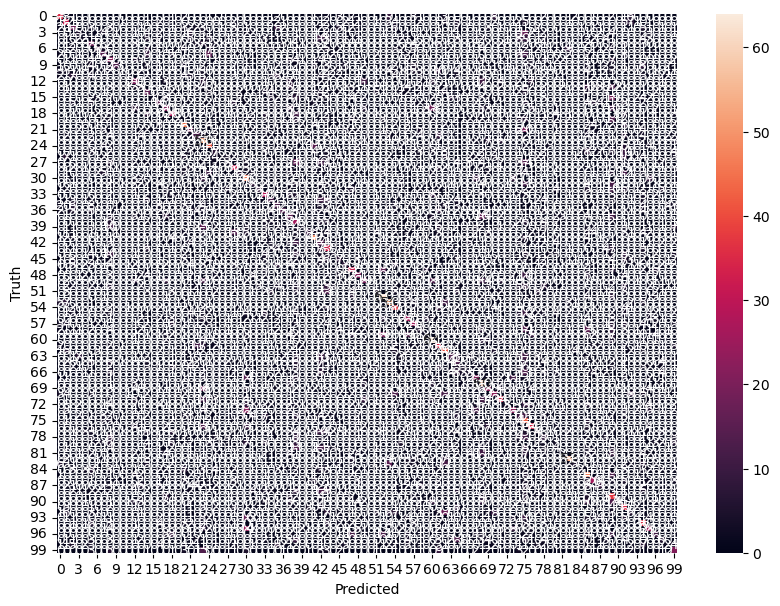

In [78]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_classes)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [79]:
cnn=models.Sequential([
    layers.Conv2D(filters=20,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(filters=30,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(150,activation='relu'),
    layers.Dense(100,activation='softmax')
])

In [80]:
cnn.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

In [81]:
cnn.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 49s 30ms/step - loss: 4.6060 - accuracy: 0.0078
Epoch 2/10
1563/1563 [==============================] - 47s 30ms/step - loss: 4.6059 - accuracy: 0.0089
Epoch 3/10
1563/1563 [==============================] - 47s 30ms/step - loss: 4.6059 - accuracy: 0.0090
Epoch 4/10
1563/1563 [==============================] - 50s 32ms/step - loss: 4.6059 - accuracy: 0.0084
Epoch 5/10
1563/1563 [==============================] - 50s 32ms/step - loss: 4.6059 - accuracy: 0.0092
Epoch 6/10
1563/1563 [==============================] - 49s 31ms/step - loss: 4.6059 - accuracy: 0.0084
Epoch 7/10
1563/1563 [==============================] - 48s 30ms/step - loss: 4.6059 - accuracy: 0.0087
Epoch 8/10
1563/1563 [==============================] - 47s 30ms/step - loss: 4.6059 - accuracy: 0.0088
Epoch 9/10
1563/1563 [==============================] - 47s 30ms/step - loss: 4.6059 - accuracy: 0.0089
Epoch 10/10
1563/1563 [==============================] - 48s 31m

In [82]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 4s 13ms/step - loss: 4.6052 - accuracy: 0.0100


[4.605201721191406, 0.009999999776482582]

In [83]:
y_pred=cnn.predict(x_test)
y_pred[:5]

313/313 [==============================] - 4s 13ms/step


array([[0.01015303, 0.00999781, 0.00998531, 0.00996479, 0.01001119,
        0.00995763, 0.01000979, 0.01011842, 0.01003749, 0.01003821,
        0.01011811, 0.00997818, 0.01005232, 0.01010501, 0.01007578,
        0.00995448, 0.01012455, 0.00999663, 0.01003367, 0.01005899,
        0.00989992, 0.01005553, 0.00997605, 0.00987198, 0.00994629,
        0.01005976, 0.01002132, 0.01001749, 0.01005603, 0.0099267 ,
        0.0101303 , 0.01015872, 0.00987399, 0.00985955, 0.00991375,
        0.00989679, 0.00993374, 0.00994246, 0.0100899 , 0.01009281,
        0.0098756 , 0.01004335, 0.01005703, 0.00999353, 0.00994688,
        0.00990209, 0.0100737 , 0.01009401, 0.00998769, 0.01002715,
        0.01004824, 0.00992926, 0.01007813, 0.01007584, 0.01015356,
        0.00988825, 0.0100022 , 0.00994745, 0.01000745, 0.009893  ,
        0.01005635, 0.00989634, 0.01006256, 0.00996496, 0.00998818,
        0.0100744 , 0.00993132, 0.00997924, 0.01003108, 0.00999525,
        0.00993031, 0.01001902, 0.00992778, 0.01

In [84]:
y_classes=[np.argmax(element) for element in y_pred]
y_classes[:5]

[78, 78, 78, 78, 78]

In [85]:
y_test[:5]

array([49, 33, 72, 51, 71])

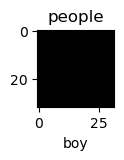

In [86]:
plot_sample(x_test,y_test,4)

In [87]:
y_classes[3]

78

In [88]:
from sklearn.metrics import classification_report
import numpy as np
y_pred = cnn.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print(classification_report(y_test,y_pred_classes))

313/313 [==============================] - 4s 13ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       100
           1       0.00      0.00      0.00       100
           2       0.00      0.00      0.00       100
           3       0.00      0.00      0.00       100
           4       0.00      0.00      0.00       100
           5       0.00      0.00      0.00       100
           6       0.00      0.00      0.00       100
           7       0.00      0.00      0.00       100
           8       0.00      0.00      0.00       100
           9       0.00      0.00      0.00       100
          10       0.00      0.00      0.00       100
          11       0.00      0.00      0.00       100
          12       0.00      0.00      0.00       100
          13       0.00      0.00      0.00       100
          14       0.00      0.00      0.00       100
          15       0.00      0.00      0.00       100
          16       0.00  

C:\Users\kalai\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kalai\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kalai\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
